# Tmall订单数据分析与假设检验

## 数据加载

In [2]:
import pandas as pd
import os

# 加载数据
file_path = os.path.join('../data', 'tmall_order_report.csv')
data = pd.read_csv(file_path)

# 显示数据前五行
data.head()

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额
0,1,178.8,0.0,上海,2020-02-21 00:00:00,NaN,0.0
1,2,21.0,21.0,内蒙古自治区,2020-02-20 23:59:54,2020-02-21 00:00:02,0.0
2,3,37.0,0.0,安徽省,2020-02-20 23:59:35,NaN,0.0
3,4,157.0,157.0,湖南省,2020-02-20 23:58:34,2020-02-20 23:58:44,0.0
4,5,64.8,0.0,江苏省,2020-02-20 23:57:04,2020-02-20 23:57:11,64.8


## 数据分布分析

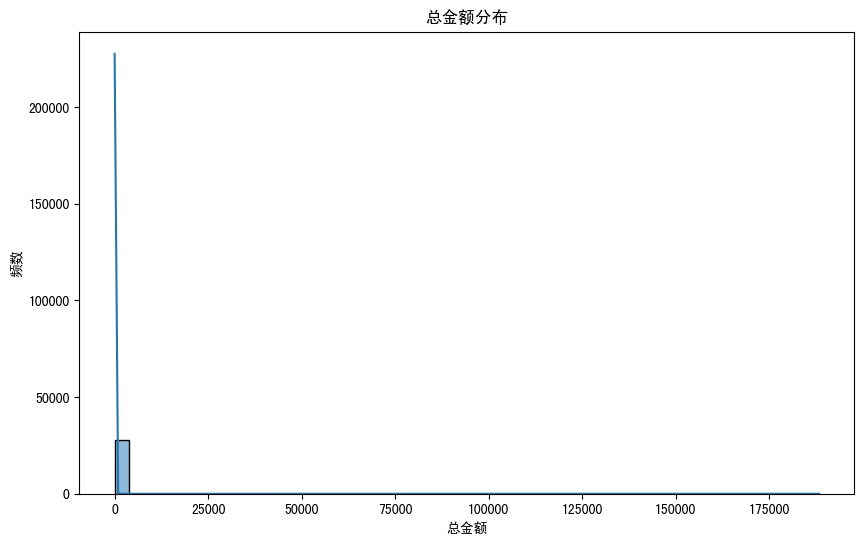

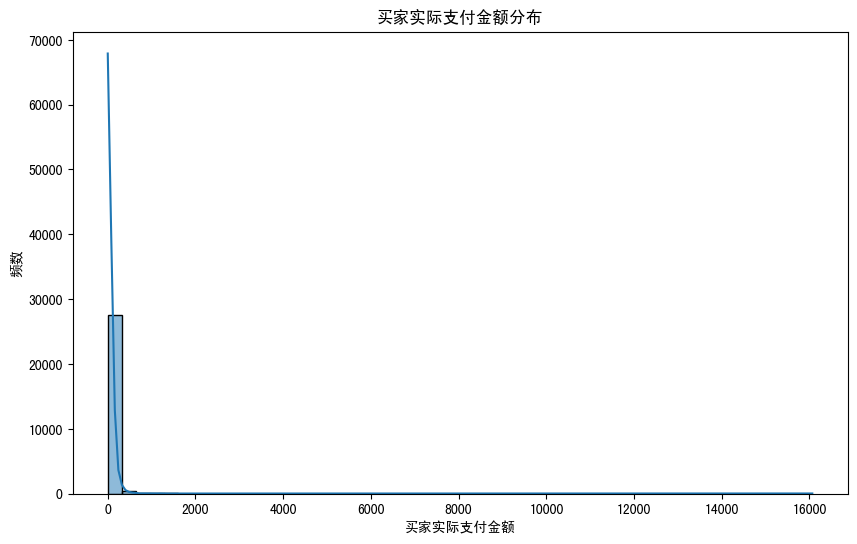

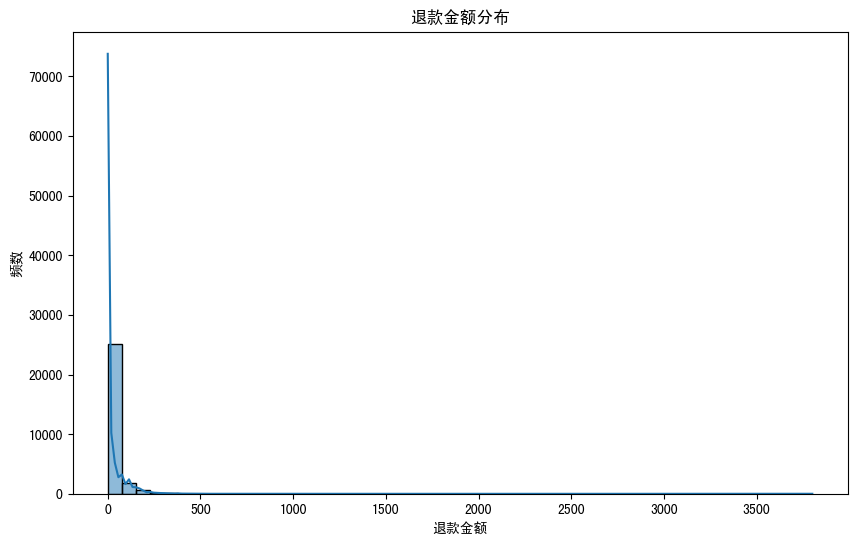

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 分析总金额分布
plt.figure(figsize=(10, 6))
sns.histplot(data['总金额'], bins=50, kde=True)
plt.title('总金额分布')
plt.xlabel('总金额')
plt.ylabel('频数')
plt.show()

# 分析买家实际支付金额分布
plt.figure(figsize=(10, 6))
sns.histplot(data['买家实际支付金额'], bins=50, kde=True)
plt.title('买家实际支付金额分布')
plt.xlabel('买家实际支付金额')
plt.ylabel('频数')
plt.show()

# 分析退款金额分布
plt.figure(figsize=(10, 6))
sns.histplot(data['退款金额'], bins=50, kde=True)
plt.title('退款金额分布')
plt.xlabel('退款金额')
plt.ylabel('频数')
plt.show()

## 假设检验

In [4]:
from scipy import stats

# 假设检验：买家实际支付金额是否显著大于退款金额
t_stat, p_value = stats.ttest_ind(data['买家实际支付金额'], data['退款金额'], alternative='greater')

print(f"T检验统计量: {t_stat}")
print(f"P值: {p_value}")

if p_value < 0.05:
    print("结论：买家实际支付金额显著大于退款金额（显著性水平为0.05）。")
else:
    print("结论：买家实际支付金额不显著大于退款金额（显著性水平为0.05）。")

T检验统计量: 47.443752581601885
P值: 0.0
结论：买家实际支付金额显著大于退款金额（显著性水平为0.05）。


## 可视化分析

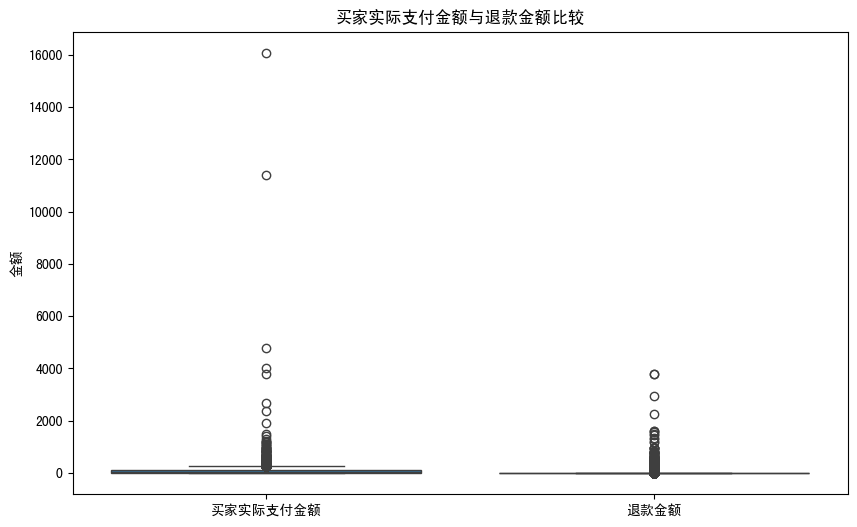

In [5]:
# 箱线图比较
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['买家实际支付金额', '退款金额']])
plt.title('买家实际支付金额与退款金额比较')
plt.ylabel('金额')
plt.show()